# 1 - Importation
## 1.1 - Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import plotly.express as px

# KMeans librairies
from sklearn import decomposition, preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# linear regression librairies
#from statsmodels.formula import ols
from statsmodels.stats.diagnostic import het_white, normal_ad
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

# Logistic regression librairies
from statsmodels.api import Logit
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, classification_report

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from scipy.stats import mode
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import silhouette_score



import visualization
from visualization import *


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## 1.2 - Données

In [2]:
bill_data = pd.read_csv("billets.csv", sep = ";")

# 2 - Nettoyage des données
## 2.1 -  Visualisation des données

In [3]:
bill_data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
bill_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


#### - On peut remarquer qu'il y a des valeurs manquantes pour la variable margin_low, sur lesquelles je reviendrai ultérieurement
### 2.1.1 - statistiques descriptives pour une meilleur compréhension des données.

In [5]:
descriptive_stats  = bill_data.describe().round(2)
descriptive_stats

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.00,1500.00,1500.00,1463.00,1500.00,1500.00
mean,171.96,104.03,103.92,4.49,3.15,112.68
std,0.31,0.30,0.33,0.66,0.23,0.87
min,171.04,103.14,102.82,2.98,2.27,109.49
25%,171.75,103.82,103.71,4.01,2.99,112.03
50%,171.96,104.04,103.92,4.31,3.14,112.96
75%,172.17,104.23,104.15,4.87,3.31,113.34
max,173.01,104.88,104.95,6.90,3.91,114.44


- diagonal
    - Moyenne     :   171.96
    - Ecart-type  :   0.31
    - Min         :   171.04
    - Max         :   173.01

- height_left
    - Moyenne     :   104.03
    - Ecart-type  :   0.30
    - Min         :   103.14
    - Max         :   104.88

- height_right
    - Moyenne     :   103.92
    - Ecart-type  :   0.33
    - Min         :   102.82
    - Max         :   104.95

- margin_low
    - Moyenne     :   4.49
    - Ecart-type  :   0.66
    - Min         :   2.98
    - Max         :   6.90

- margin_up
    - Moyenne     :   3.15
    - Ecart-type  :   0.23
    - Min         :   2.27
    - Max         :   3.91

- length
    - Moyenne     :   112.68
    - Ecart-type  :   0.87
    - Min         :   109.49
    - Max         :   114.44

### 2.1.2 - Visualisation de la distribution des données en fonction de l'authenticité ou non des billets.
#### 2.1.2.1 - répartition des billets conformes et non conformes

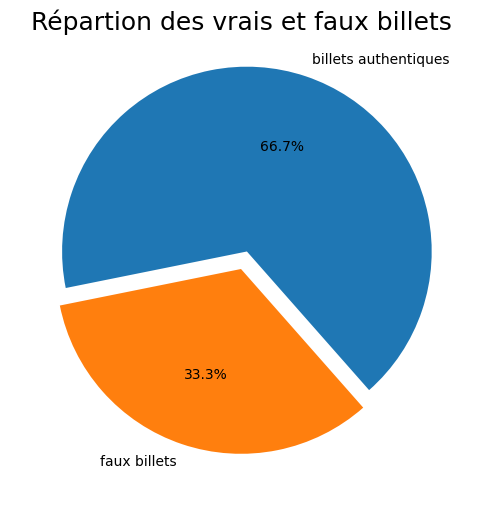

In [6]:
fig, ax = plt.subplots(figsize = (10,6))
labels = ["billets authentiques", "faux billets"]
ratios = [.27, .56, .17]
explode = [.1,0]
angle = -180 * ratios[0]
ax.pie(bill_data["is_genuine"].value_counts(normalize=True), autopct= "%1.1f%%", labels=labels, explode=explode, startangle=angle)
plt.title ("Répartion des vrais et faux billets", fontsize = 18)
#plt.savefig("repartion_billets_pieplot.jpg", dpi =1200)
plt.show()

#### 2.1.2.2 - Histogrammes

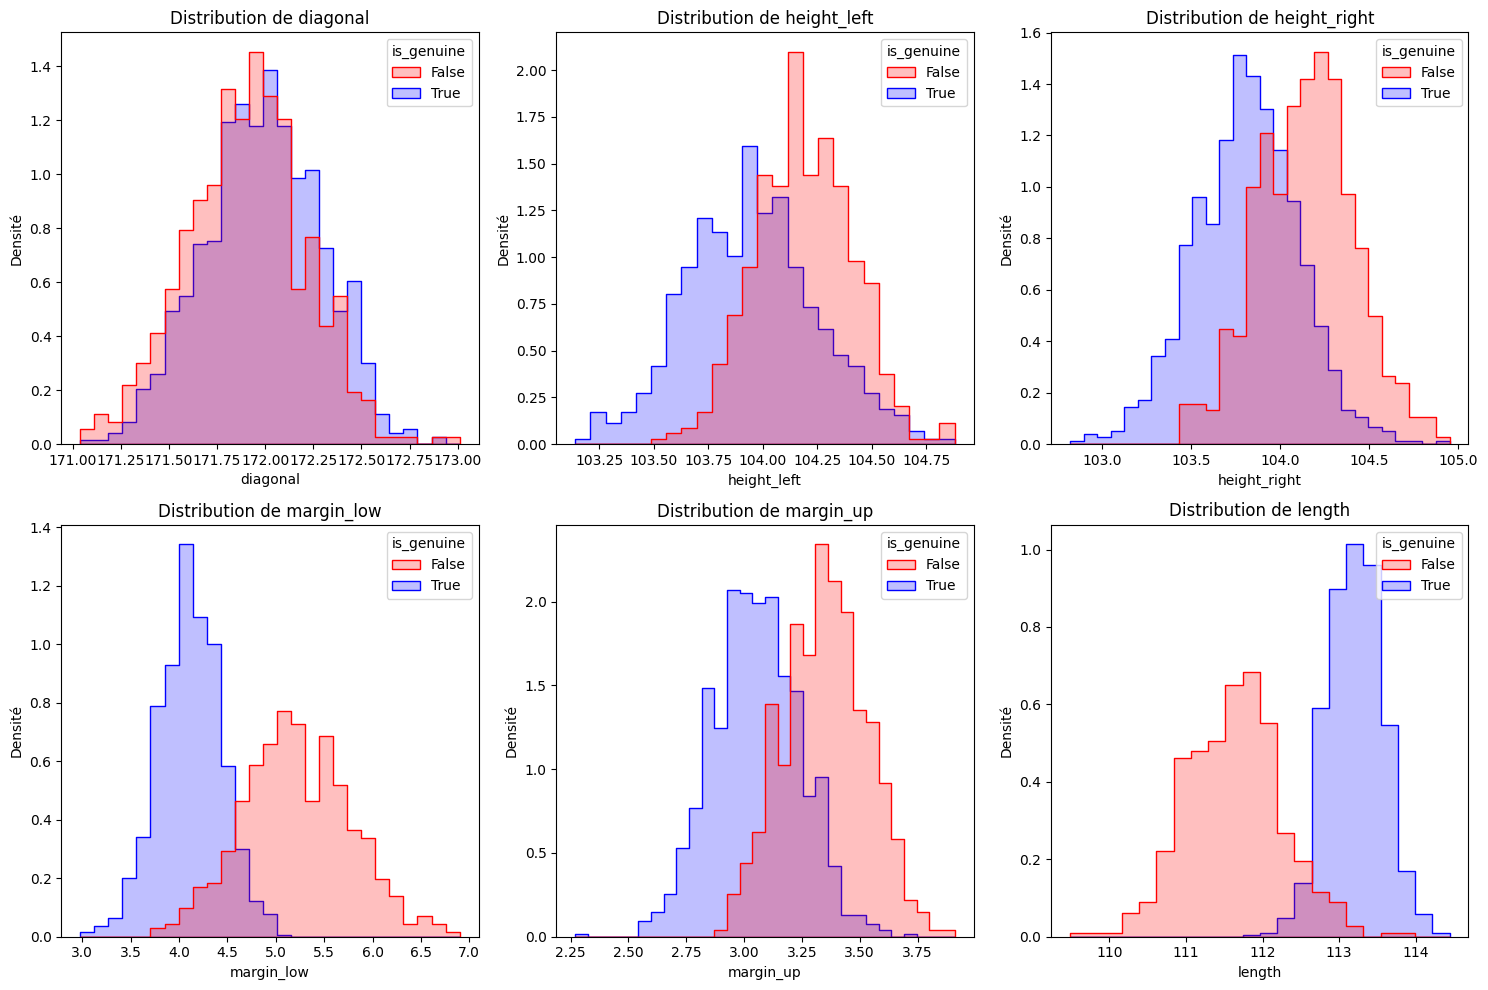

In [7]:
features = bill_data.columns.drop("is_genuine")

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axes = axes.flatten()

custom_palette = {False : "red", True : "blue"}

for i, feature in enumerate(features, start=0):
    sns.histplot(bill_data, x=feature, hue="is_genuine", element="step", stat="density", common_norm=False, palette = custom_palette, ax=axes[i])
    axes[i].set_title(f"Distribution de {feature}")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Densité")

plt.tight_layout()
plt.show()

- Diagonal :
    - Les vrais et faux billets ont des distributions quasiment identiques, même si les vrais billets ont tendance à avoir une diagonale très légèrement plus grande.
- Height_left et Height_right :
    - Les distributions des vrais et faux billets sont assez similaires pour ces deux caractéristiques, bien que les faux billets aient une légère tendance à être plus grands.
- Margin_low :
    - Les distributions sont nettement différentes pour les vrais et faux billets. Les vrais billets ont tendance à avoir une plus petite marge inférieure.
- Margin_up :
    - Les faux billets ont généralement une marge supérieure légèrement plus grande.
- Length :
    - Les vrais billets se différencient nettement et ont tendance à être un peu plus longs que les faux.

# 3 - Prétraîtement des données
## 3.1 - Vérification des valeurs manquantes

In [8]:
missing_values = bill_data.isnull().sum()
missing_values

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

#### - La colonne "margin_low" compte bien 37 valeurs nulles.
## 3.2 - Imputation des valeurs manquantes pour "margin_low" par régression linéaire
### 2.3.1 - Division du dataframe en données avec valeurs connues et avec valeurs manquantes, concernant "margin_low"
- 1- Séparation des données en deux ensembles :
    - "known_margin_low" : observation pour lesquelles on connait la valeur de "margin_low".
    - "missing_margin_low" : obesrvations pour lesquelles la valeur de "margin_low" est manquante.
- 2 - Formation d'un modèle de régression lin"aire sur "known_margin_low" pour prédire la caractéristique "margin_low" en utilisant les autres caractéristiques comme variables prédictives.
- 3 -  Utilisation de ce modèle pour imputer les valeurs manquantes dans "missing_margin_low".

In [9]:
known_margin_low = bill_data.dropna(subset=["margin_low"])
missing_margin_low = bill_data[bill_data["margin_low"].isnull()]

X_known = known_margin_low.drop(columns=["is_genuine", "margin_low"])
y_known = known_margin_low["margin_low"]
X_missing = missing_margin_low.drop(columns=["is_genuine", "margin_low"])

# Création et entraînement du modèle de régression linéaire
lr_model = LinearRegression()
lr_model.fit(X_known, y_known)

# Prédiction des valeurs manquantes pour "margin_low"
predicted_values = lr_model.predict(X_missing)

# Imputation des valeurs manquantes dans bill_data
bill_data.loc[bill_data["margin_low"].isnull(), "margin_low"] = predicted_values

# Nouvelle vérification des valeurs manquantes
new_missing_values = bill_data.isnull().sum()
new_missing_values

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Toutes les valeurs manquantes ont bien été imputées
## 3.3 - Vérification de présence de duplicatas

In [10]:
duplicates = bill_data.duplicated().sum()
duplicates

0

Il n'y a aucun doublon dans le jeu de données.
## 3.4 - Vérification des valeurs aberrantes

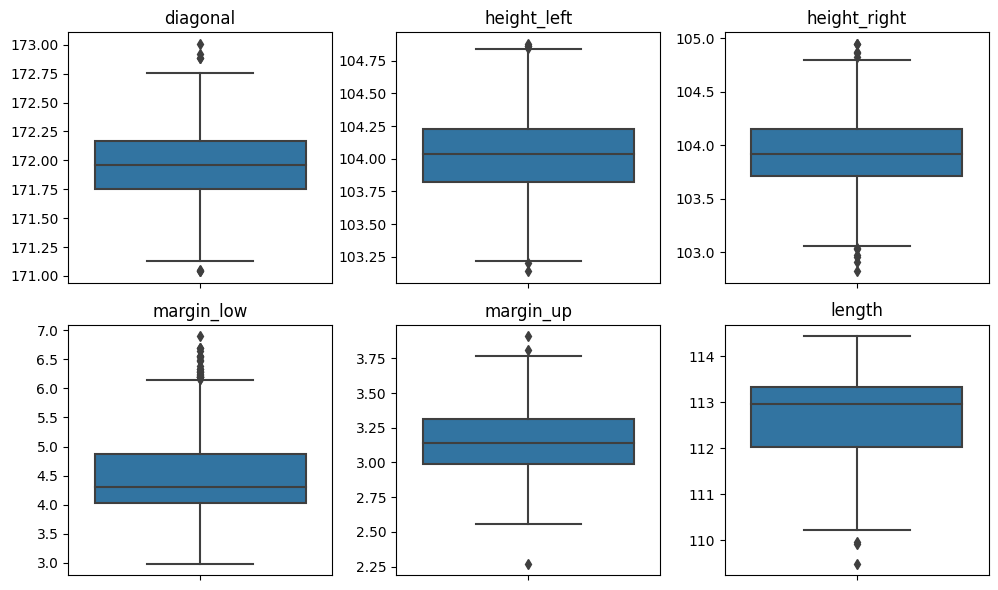

In [11]:
plt.figure(figsize = (10, 6))
for i, column in enumerate(bill_data.columns [1 : ], start =  1): # colonne "is_genuine" ignorée
    plt.subplot(2, 3, i)
    sns.boxplot(y  = bill_data[column])
    plt.title(column)
    plt.ylabel("")

plt.tight_layout()
plt.show()

- Diagonal, Height_left et Height_right :
    - Quelques points semblent être légèrement en dehors des moustaches, ce qui suggère de possibles valeurs aberrantes.
- Margin_low :
    - Plusieurs points se situent en dehors des moustaches, indiquant plusieurs valeurs potentiellement aberrantes.
- Margin_up et Length :
    - Peu de valeurs aberrantes détectées pour ces caractéristiques.

Bien que ces points puissent être considérés comme des valeurs aberrantes basées sur des statistiques descriptives, ils peuvent toujours représenter des variations naturelles dans les mesures des billets. Avant de prendre une décision sur le traitement de ces points, il serait judicieux de considérer leur impact sur le modèle de prédiction.

Pour l'instant, je vais conserver ces points, car ils peuvent être informatifs pour mon modèle. Si je constate, plus tard, qu'ils ont un impact négatif sur les performances du modèle, je pourrai envisager de les retirer ou de les traiter.
## 3.5 - Evaluation de la régression linéaire pour l'imputation.
### 3.5.1 - Vérification de la linéarité.

In [12]:
X_known_with_intercept = sm.add_constant(X_known)
model = sm.OLS(y_known, X_known_with_intercept).fit()

#### 3.5.1.2 - Calcul des résidus.

In [13]:
residuals = model.resid

#### 3.5.1.3 - Erreur Quadratique Moyenne

In [14]:
mse = model.mse_resid

#### 3.5.1.4 - Calcul de l'effet de levier.

In [15]:
leverage = OLSInfluence(model).hat_matrix_diag

#### 3.5.1.5 - Calcul des résidus studentisés.

In [16]:
studentized_residuals = residuals / np.sqrt(mse * (1 - leverage))

In [17]:
# Calcul des résidus pour la régression linéaire.
# y_pred_lr = lr_model.predict(X_known)
# residuals = y_known - y_pred_lr

Text(0, 0.5, 'Résidus studentisés')

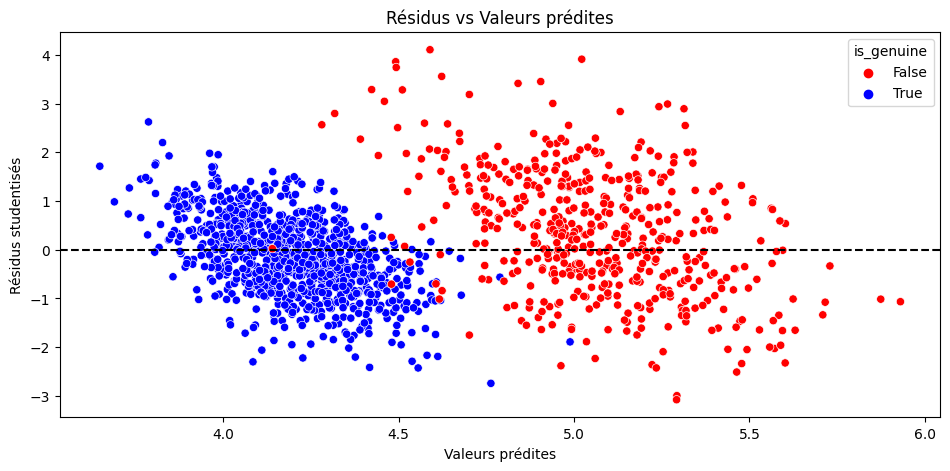

In [18]:
plt.figure(figsize = (25, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=model.fittedvalues, y=studentized_residuals, hue=bill_data["is_genuine"], palette={True: 'blue', False: 'red'})
plt.axhline(0, color='black', linestyle='--')
plt.title("Résidus vs Valeurs prédites")
plt.xlabel("Valeurs prédites")
plt.ylabel("Résidus studentisés")

- Pour la plupart des valeurs prédites, les résidus semblent se disperser de manière relativement aléatoire autour de zéro.
- Il est intéressant de remarquer que les billets authentiques (en bleu) et les faux billets (en rouge) ne présentent pas de motifs distincts dans la dispersion des résidus, indiquant que les erreurs du modèle ne sont pas spécifiques à un type de billet.
- Conclusion :
    - Les résidus se dispersent de manière relativement aléatoire autour de zéro, ce qui est un bon signe pour la linéarité de la relation.
### 3.5.2 - Vérification de l'homoscédasticité des résidus.

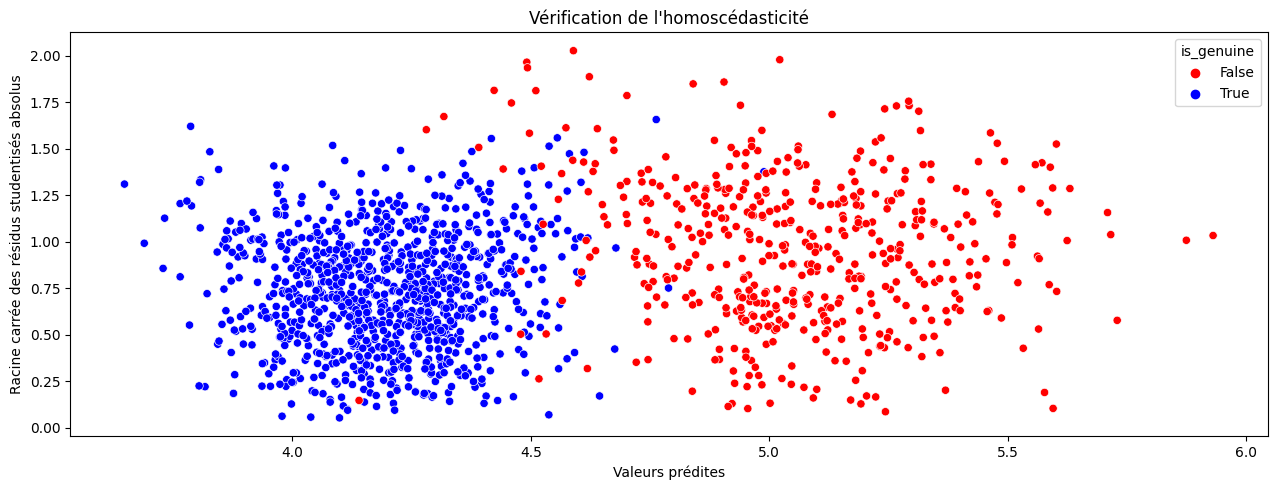

In [19]:
plt.figure(figsize=(25, 5))
plt.subplot(1, 2, 2)
sns.scatterplot(x=model.fittedvalues, y=np.sqrt(np.abs(studentized_residuals)), hue=bill_data["is_genuine"], palette={True: 'blue', False: 'red'})
plt.title("Vérification de l'homoscédasticité")
plt.xlabel("Valeurs prédites")
plt.ylabel("Racine carrée des résidus studentisés absolus")

plt.tight_layout()
plt.show()


- La dispersion des résidus semble relativement constante sur toute la plage des valeurs prédites.
- Comme pour la vérification de linéarité, les billets authentiques et les faux billets ne montrent pas de motifs distincts dans la dispersion des résidus.
- Conclusions :
    - Les résidus montrent une dispersion constante sur toute la plage des valeurs prédites, ce qui est un bon signe pour l'homoscédasticité.
    - Il n'y a pas de motifs distincts dans les résidus pour les billets authentiques par rapport aux faux billets. Cela indique que les erreurs que le modèle commet ne sont pas spécifiques à un type de billet.
### 3.5.3 - Normalité des résidus

<Figure size 1500x500 with 0 Axes>

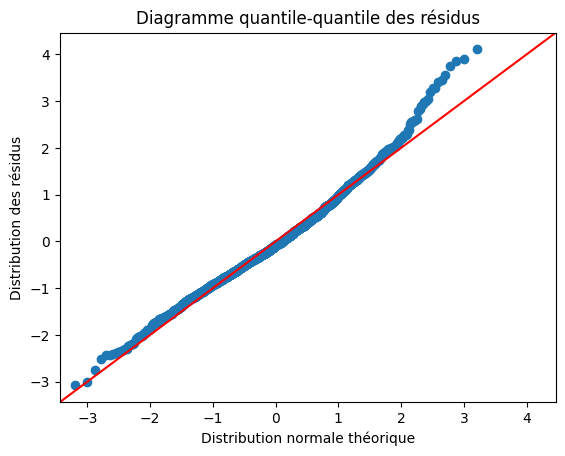

In [20]:
# Comparaison de la forme de distribution normale. Si les points suivent la ligne à 45° (ligne y = x), alors les résidus sont normalement distribués.
plt.figure(figsize=(15,5))
sm.qqplot(studentized_residuals, line="45", fit=True)
plt.xlabel("Distribution normale théorique")
plt.ylabel("Distribution des résidus")
plt.title("Diagramme quantile-quantile des résidus")
plt.show()

- Les points du diagramme Quantile-Quantile des résidus suivent étroitement la diagonale à 45°, ce qui suggère une distribution normale de ces derniers, bien qu'il y ait quelques déviations, notamment dans les queues.

-Conclusios : 

# 4 - Analyses univariées et multivariées.
## 4.1 - Analyse univariée.
### 4.1.1 - Statistiques descriptives des caractéristiques

In [21]:
descriptive_stats = bill_data.describe().round(2)
descriptive_stats

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.00,1500.00,1500.00,1500.00,1500.00,1500.00
mean,171.96,104.03,103.92,4.48,3.15,112.68
std,0.31,0.30,0.33,0.66,0.23,0.87
min,171.04,103.14,102.82,2.98,2.27,109.49
25%,171.75,103.82,103.71,4.02,2.99,112.03
50%,171.96,104.04,103.92,4.31,3.14,112.96
75%,172.17,104.23,104.15,4.87,3.31,113.34
max,173.01,104.88,104.95,6.90,3.91,114.44


- Diagonal:
    - La diagonale des billets varie de 171.04 mm à 173.01 mm avec une moyenne de 171.96 mm.
- Height_left:
    - La hauteur gauche des billets varie de 103.14 mm à 104.88 mm avec une moyenne de 104.03 mm.
- Height_right:
    - La hauteur droite des billets varie de 102.82 mm à 104.95 mm avec une moyenne de 103.92 mm.
- Margin_low:
    - La marge inférieure varie de 2.98 mm à 6.90 mm avec une moyenne de 4.49 mm.
- Margin_up: La marge supérieure varie de 2.27 mm à 3.91 mm avec une moyenne de 3.15 mm.
- Length:
    - La longueur des billets varie de 109.49 mm à 114.44 mm avec une moyenne de 112.68 mm.

## 4.2 - Analyse multivariée
### 4.2.1 - matrice de corrélation
- La matrice de corrélation permet de constater les liaisons des variables, les unes aux autres.

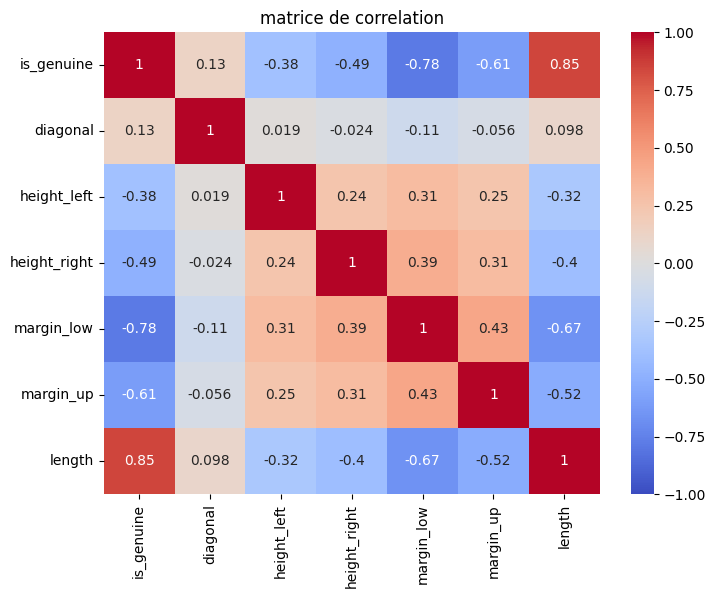

In [22]:
correlation_matrix = bill_data.corr()

plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm",vmin = -1, vmax = 1)
plt.title("matrice de correlation")
plt.show()

- "Diagonal" montre une forte corrélation positive avec "Length" (0.86) et Margin_up (0.84):
    - lorsque la diagonale d'un billet augmente, sa longueur et sa marge supérieure ont tendance à en faire de même.
- "Height_left" et "Height_right" présentent également une forte corrélation positive (0.93), ce qui est attendu car elles mesurent la hauteur du billet des deux côtés.
- "Length" présente une corrélation négative modérée avec "Margin_low" (-0.55).
- "is_genuine" présente :
    - Une forte corrélation positive avec "lenght".
    - Une corrélation negative non négligeable, si ce n'est forte, avec "margin_low".
    - Ces 2 caractéristiques ont, une interaction probablement non négligeable avec l'authentiticité des billets.

## 4.2.2 - Grapiques de dispersion
- identification de tendances ou de groupes potentiels.

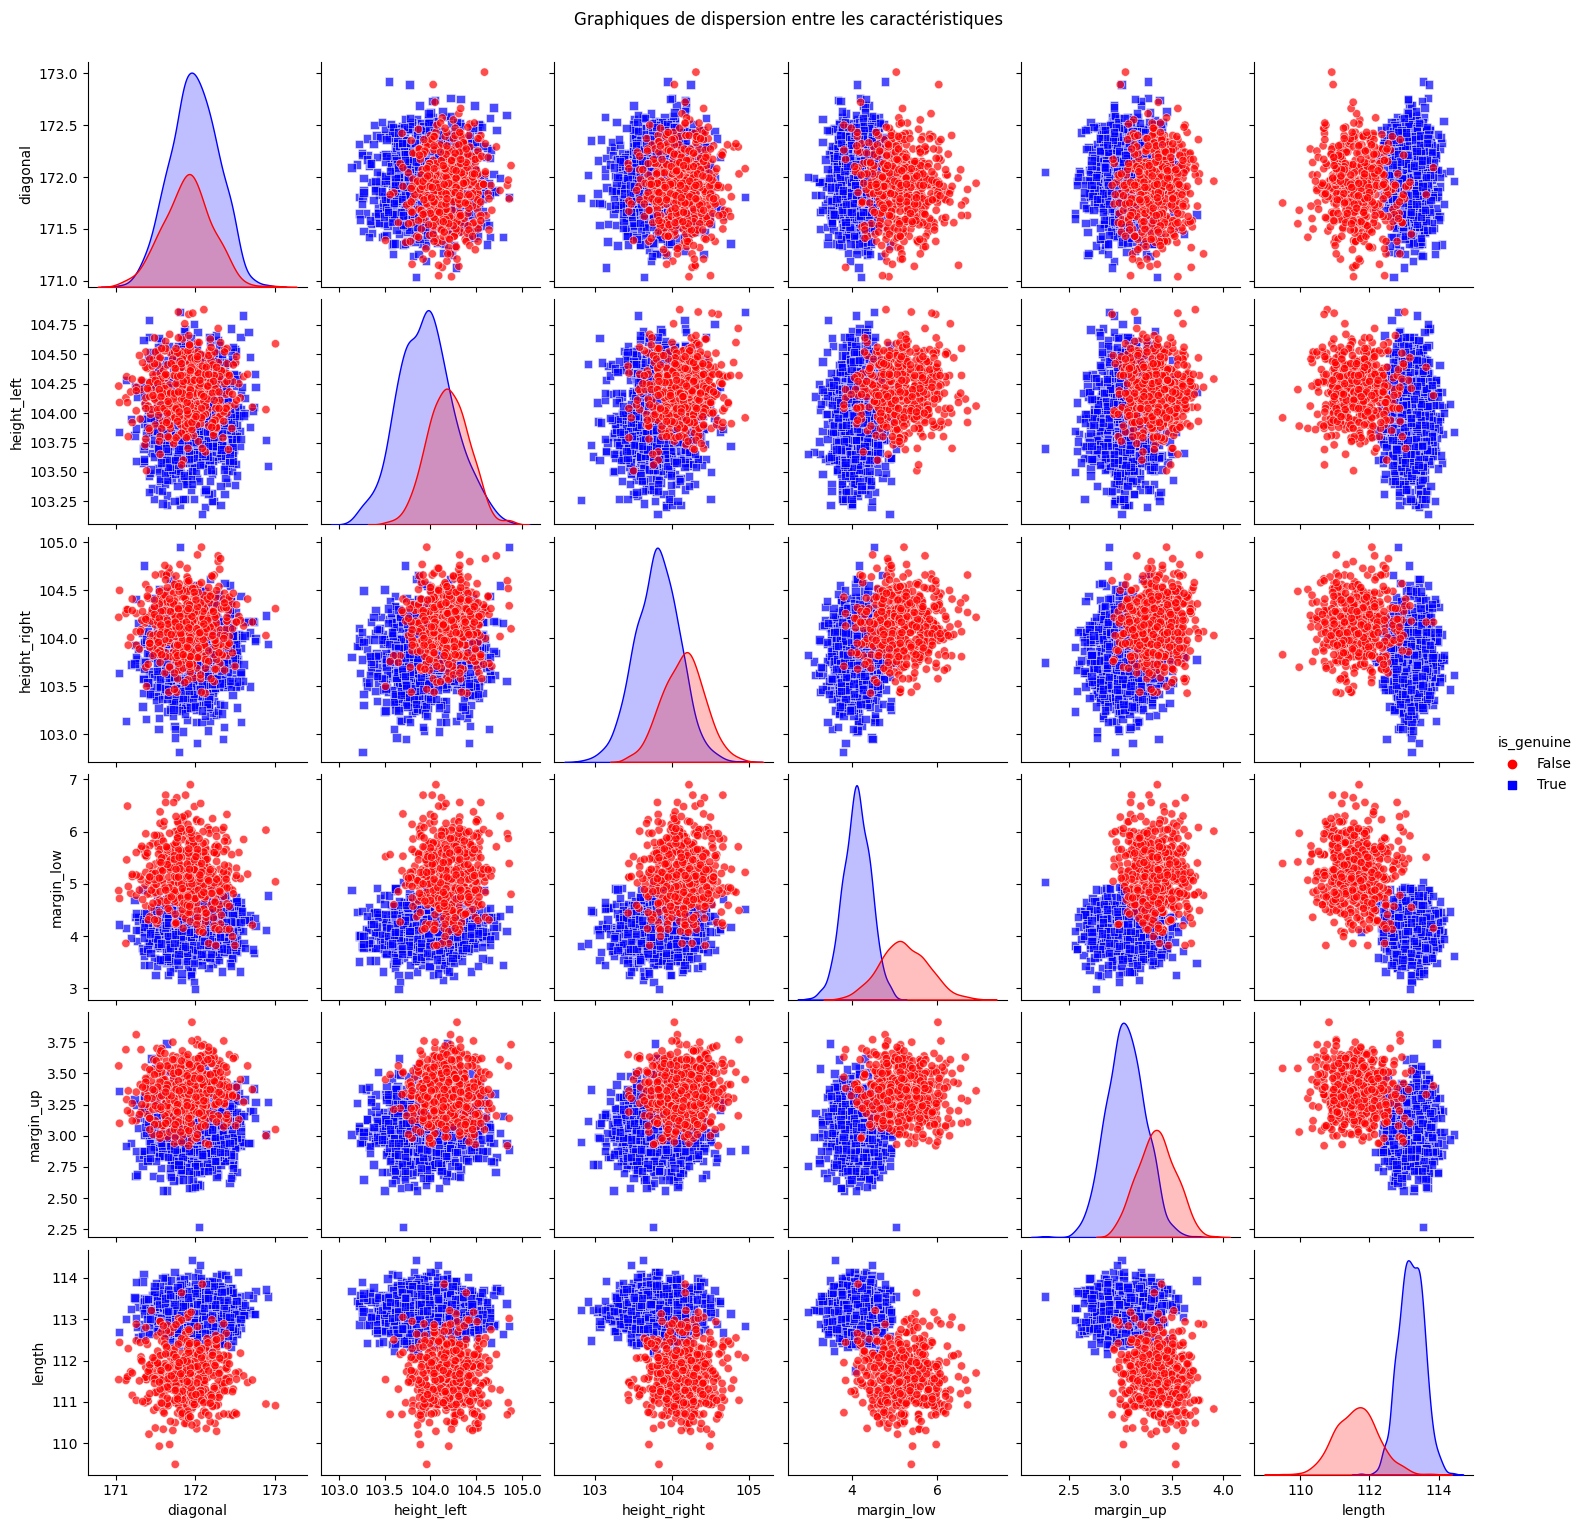

In [23]:
sns.pairplot(bill_data, hue="is_genuine", palette=custom_palette, diag_kind="kde", markers=["o", "s"], plot_kws={'alpha':0.7})
plt.suptitle("Graphiques de dispersion entre les caractéristiques", y=1.02)
plt.show()


- Sur la diagonale, représentant la distribution de chaque caractéristique, on obtient l'estimation de la densité du noyau.
    - En observant ceux-ci, on peut remarquer une certaine différence entre les vrais et les faux billets, en particuliers pour "margin_low" et "lenght", et plus légèrement pour "margin_up".
- Les nuages de point montrent les relations par paires de caractéristiques.
    - Les graphiques de dispersion montrent certaines caractéristiques pouvant aider à séparer les vrais des faux billets.
    -Par exemple, on peut voir une séparation assez nette entre "lenght" et "margin_low".
- Certains graphiques montrent des regroupements clairs, ce qui pourrait amener à penser qu'utiliser des techniques de clustering, comme les k-means, pourrait être utile.
# 5 - Régression logistique sur l'ensemble des données.
## 5.1 - Prétraitement des données
### 5.1.1 - Séparation des données en ensembles d'entraînement et de test.

In [24]:
X = bill_data.drop("is_genuine", axis=1)
y = bill_data["is_genuine"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

### 5.1.2 -Entraînement du modèle


In [25]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
# Prédiction sur l'ensemble de test
y_pred_train = logistic_model.predict(X_train)
y_pred_test = logistic_model.predict(X_test)

### 5.1.3 - Evaluation du modèle

In [26]:
train_score = accuracy_score(y_train, y_pred_train)
test_score = accuracy_score(y_test, y_pred_test)

train_score, test_score

(0.9891666666666666, 0.99)

- Précision sur l'ensemble d'entraînement : 98.92 % .
- Précision sur l'ensemble de test : 99 % .
Ces scores élevés indiquent que le modèle est capable de classer correctement un grand nombre d'observation.
Cependant, il serait bon de vérifier si le modèle n'est pas en suraprentissage (trop bien adapté à l'ensemble d'entrainement au détriment de sa capacité à généraliser sur de nouvelles données).
### 5.1.4 - Distribution des probabilités prédites

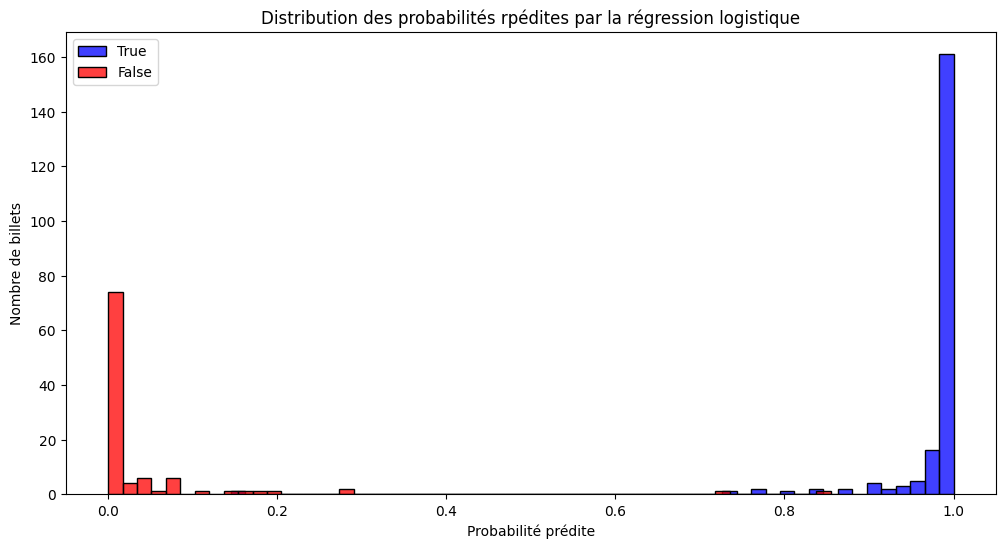

In [27]:
# probabilités prédites pour la classe 1 (billets authentiques)
probs_true = logistic_model.predict_proba(X_test)[:, 1]

plt.figure(figsize = (12, 6))

# Histogramme pour les billets authentiques
sns.histplot(probs_true[y_test == True], bins=50, color="blue", label='True')
# Histogramme pour les faux billets
sns.histplot(probs_true[y_test == False], bins=50, color="red", label='False')

plt.xlabel("Probabilité prédite")
plt.ylabel("Nombre de billets")
plt.title("Distribution des probabilités rpédites par la régression logistique")
plt.legend()

plt.show()


- La distribution montre que la majorité des probabilités prédites pour les billets authentiques sont proches de 1.
    - Le modèle montre une certaine confiance dans ses prédictions, concernant ces billets.
- Inversement, la plupart des probabilités prédites pour les faux billets sont proches de 0.
    - Cela indique également que le modèle est confiant dans ses prédictions pour ces billets.
- Cela suggère que le modèle est capable de distinguer clairement la distinction entre vrais et faux billets.
    - Ceci est une bonne undication quant à l'homogénéité et la qualité du modèle.
    - On peut, amlgré tout, constater quelques chevauchements, ce qui pourrait indiquer que certaines prédictions ne sont pas aussi claires.

## 5.2 - vérifications de la qualité du modèle :
- J'effectue ces tests sur les données test et non pas celles d'entraînement, afin d'éviter tout surapprentissage et d'obtenir une estimation honnête de la performance.
### 5.2.1 - Matrice de confusion.
visualisation des prédictions du modèle par rapport aux véritables étiquettes.Utile pour la compréhension des performances du modèle sur les différentes classes.


<Figure size 800x600 with 0 Axes>

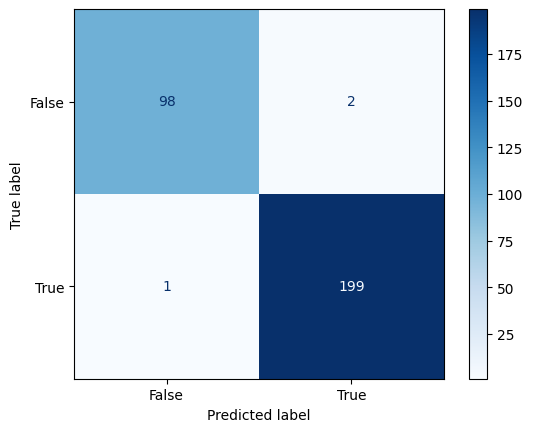

In [28]:
# Prédiction à l'aide du modèle de régression logistique.
y_pred = logistic_model.predict(X_test)
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize =(8,6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model.classes_)
disp.plot(cmap ="Blues")


- Taux de faux positifs : 0.67 % du dataset .
- Taux de vrais négatifs  : 0.33 % du dataset.
### 5.2.2 - Courbe ROC 
- Evaluation du taux de vrais positifs en fonction du taux de faux positifs pour différents seuils de décision.

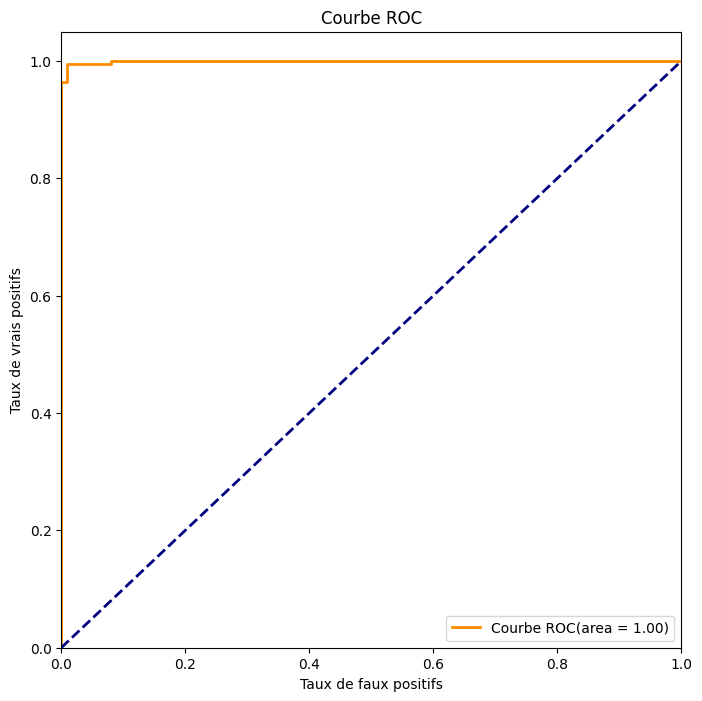

In [29]:
# Calcul des scores de probabilité
y_score = logistic_model.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, _ =roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (8, 8))

plt.plot(fpr, tpr, color = "darkorange", lw=2, label = "Courbe ROC(area = %0.2f)" % roc_auc )
plt.plot([0, 1], [0, 1], color = "navy", lw=2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc = "lower right")

plt.show()


- La valeur A.U.C est de 1 , ce qui suggère que le modèle a une excellente capacité à distinguer les billets authentiques des faux.
## 5.2.3 - Score F1

In [30]:
f1 = f1_score(y_test, y_pred)
f1.round(4)

0.9925

- Le score F1 obtenu est de 0.9925, indiquant que le modèle a une excellente combinaison de précision et de rappel, ce qui signifie que le modèle est très performant pour identifier correctement les vrais et les faux billets, tout en minimisant les erreurs.
## 5.2.4 - Coefficients du modèle de régression logistique.

In [31]:
coefficients = logistic_model.coef_[0]
features = X_train.columns
coeff_df = pd.DataFrame({"feature": features, "coefficients": coefficients})

coeff_df.sort_values(by="coefficients", ascending=False)

,feature,coefficients
5,length,3.916379
0,diagonal,-0.386225
1,height_left,-1.396123
2,height_right,-1.952172
4,margin_up,-3.071633
3,margin_low,-3.446020


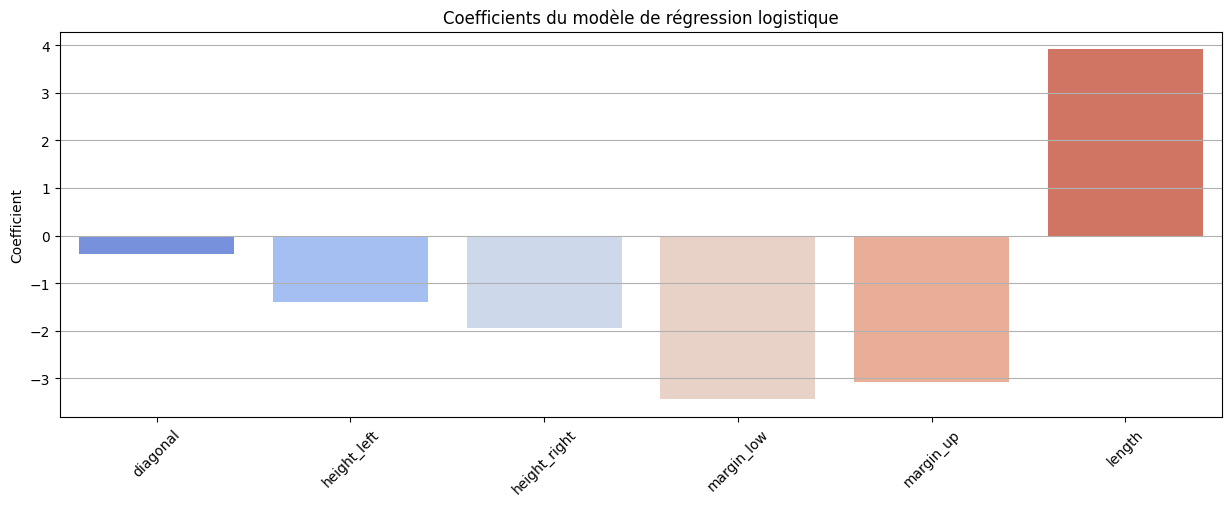

In [32]:
plt.figure(figsize=(15, 5))
sns.barplot(x=features, y=coefficients, palette="coolwarm")
plt.title('Coefficients du modèle de régression logistique')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Coefficients du modèle pour chaque caractéristique :
- Length :
    - Coefficient positif de 3.92, indiquant que l'augmentation de la longueur du billet augmente la probabilité qu'il soit authentique.
    - C'est la caractéristique ayant le plus d'impact positif sur la prédiction.
- Diagonal :
    - Le coefficient est négatif, mais proche de 0 (-0.39).
    - La diagonale a un effet légèrement négatif, mais relativement faible sur la prédiction d'authenticité.
- Height_left :
    - Avec un coefficient de -1.39, une augmentation de la hauteur gauche diminue la probabilité d'authenticité du billet.
- Height_right :
    - avec un coefficient de -1.95, les effets sont les mêmes que pour Height_left, en un peu plus prononcés.
- Margin_up :
    - Le coefficient négatif est de -3.07, ce qui indique q'une augmentation de la marge supérieure diminue considérablement la probabilité qu'un billet soit vrai.
- Margin_low :
    - C'est la caractéristique avec le coefficient négatif le plus élevé (-3.45).
    - Tout comme pour margin_up, plus la marge inférieure augmentera, moins le billet aura de probabilité d'être authentique.
### 5.2.5 - Validation croisée

In [33]:
# Mise à l'échelle des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réentraînement du modèle de régression logistique sur l'ensemble des données
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_scaled, y)

# Utilisation de la validation croisée à 5 folds afin d'évaluer la performance
scores = cross_val_score(logistic_model, X_scaled, y, cv=5, scoring="accuracy")
scores, scores.mean()

(array([0.99      , 0.98666667, 0.99666667, 0.99      , 0.99      ]),
 0.9906666666666666)

- résultats de la validation croisée :
    - 1er fold : 99.00 %
    - 2eme fold : 98.67 %
    - 3eme fold : 99.67 %
    - 4eme fold : 99.00 %
    - 5eme fold : 99.00 %
- La performance moyenne sur les 5 folds est de 99.07 %.
- Ces scores suggèrent que le modèle de régression logistique est performant et généralise bien sur différentes partitions des données.
# 6 - Régression logistique avec les caractéristiques "length", "margin_low" et "margin_up".
## 6.1 - Prétraitement des données
### 6.1.1 - Séparation des données en ensembles d'entraînement et de test.

In [34]:

    # Sélection des caractéristiques "length" et "margin_low"
X2 = bill_data[["length", "margin_low", "margin_up"]]
y2 = bill_data["is_genuine"]
# Division des données
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42, stratify = y2)

logistic_model2 = LogisticRegression()
logistic_model2.fit(X2_train, y2_train)

y2_pred_train = logistic_model2.predict(X2_train)
y2_pred_test = logistic_model2.predict(X2_test)

#Evaluation de l'exactitude
train_score2 = accuracy_score(y2_train, y2_pred_train)
test_score2 = accuracy_score(y2_test, y2_pred_test)

train_score2, test_score2

(0.9916666666666667, 0.9866666666666667)

- Exactitude sur l'ensembles d'entraînement : 99.17 % .
- Exactitude sur l'ensemble de test : 98.67 % .
    - Ces scores sont très élevés, ce qui suggère que le modèlme de régression logistique basé sur ces deux caractéristiques est performant pour distinguer l'authenticité des billets dans l'ensemble de données.
## 6.2 - vérifications de la qualité du modèle :
### 6.2.1 - Matrice de confusion.

<Figure size 800x600 with 0 Axes>

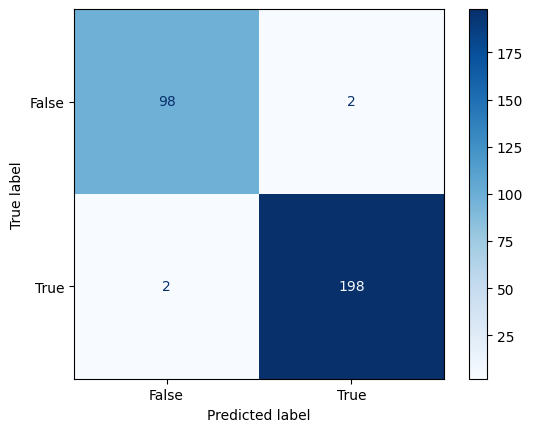

In [35]:
# Prédiction à l'aide du modèle de régression logistique.
y2_pred = logistic_model2.predict(X2_test)
# Calcul de la matrice de confusion
cm = confusion_matrix(y2_test, y2_pred)

plt.figure(figsize =(8,6))
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_model2.classes_)
disp2.plot(cmap ="Blues")

- Taux de faux positifs : 0.67 % du dataset .
- Taux de vrais négatifs  : 0.67 % du dataset.
### 6.2.2 - Courbe ROC 
- Evaluation du taux de vrais positifs en fonction du taux de faux positifs pour différents seuils de décision.

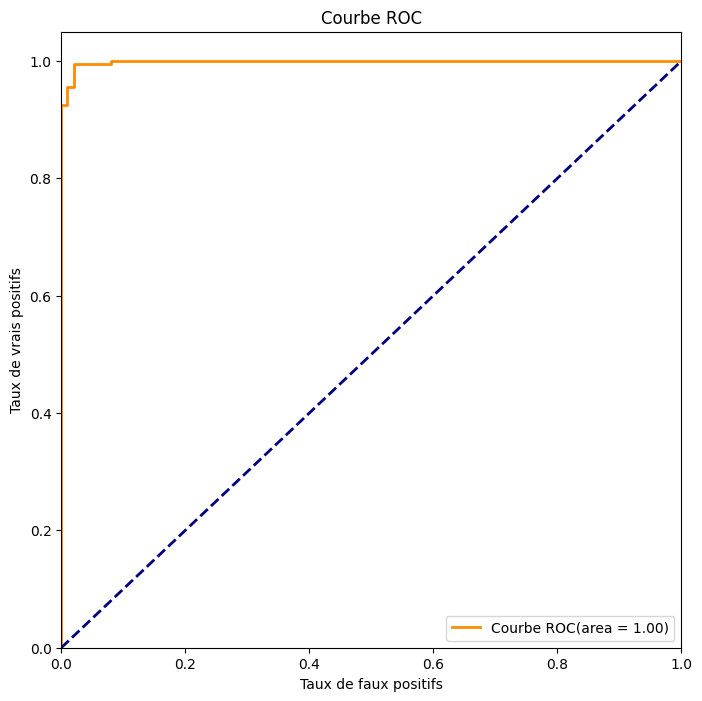

In [36]:
# Calcul des scores de probabilité
y2_score = logistic_model2.predict_proba(X2_test)[:, 1]

# Calcul de la courbe ROC
fpr2, tpr2, _ =roc_curve(y2_test, y2_score)
roc_auc2 = auc(fpr2, tpr2)

plt.figure(figsize = (8, 8))

plt.plot(fpr2, tpr2, color = "darkorange", lw=2, label = "Courbe ROC(area = %0.2f)" % roc_auc2)
plt.plot([0, 1], [0, 1], color = "navy", lw=2, linestyle = "--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc = "lower right")

plt.show()

- La valeur A.U.C est de 1 , ce qui suggère que le modèle a une excellente capacité à distinguer les billets authentiques des faux.
## 6.2.3 - Score F1

In [37]:
f1_2 = f1_score(y2_test, y2_pred)
f1_2.round(4)

0.99

- Le score F1 obtenu est de 0.99, indiquant que le modèle a une excellente combinaison de précision et de rappel, ce qui signifie que le modèle est très performant pour identifier correctement les vrais et les faux billets, tout en minimisant les erreurs.
## 6.2.4 - Coefficients du modèle de régression logistique.

In [38]:
coefficients2 = logistic_model2.coef_[0]
features2 = X2_train.columns
coeff2_df = pd.DataFrame({"feature": features2, "coefficients": coefficients2})

coeff2_df.sort_values(by="coefficients", ascending=False).round(4)

,feature,coefficients
0,length,4.3946
2,margin_up,-3.2707
1,margin_low,-3.7394


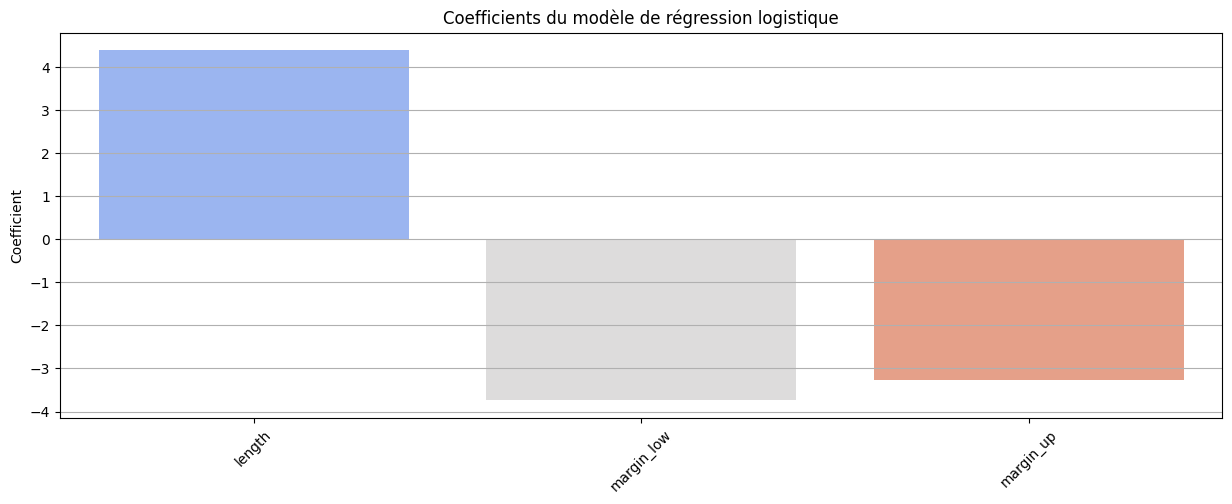

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(x=features2, y=coefficients2, palette="coolwarm")
plt.title('Coefficients du modèle de régression logistique')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Coefficients du modèle pour chaque caractéristique :
- Length :
    - Coefficient positif de 4.39, indiquant que l'augmentation de la longueur du billet augmente la probabilité qu'il soit authentique.
- Margin_up :
    - Coefficient négatif de -3.27, signifiant que plus la marge inférieure augmentera, moins le billet aura de probabilité d'être authentique.
- Margin_low :
    - Coefficient négatif de -3.74, signifiant, comme pour "margin_up" que plus la marge inférieure augmentera, moins le billet aura de probabilité d'être authentique.
### 6.2.5 - Validation croisée

In [40]:
X2 = bill_data[["margin_low", "length"]]
y2  = bill_data["is_genuine"]
# Mise à l'échelle des données
cross_val_scores2 = cross_val_score(logistic_model2, X2, y2, cv = 5)
train_score2, test_score2, cross_val_scores2.mean()

(0.9916666666666667, 0.9866666666666667, 0.9853333333333334)

- Exactitude sur l'ensembles d'entraînement : 99.17 % .
- Exactitude sur l'ensemble de test : 98.67 % .
- Moyenne des scores de validation croisée (5-fold)  : 98.53 % .
    - Ces scores confirment la haute performance du modèle de régression logistique basé sur les caractéristiques "length", "margin_low" et "margin_up" pour distinguer les billets authentiques des faux billets. La validation croisée donne une estimation plus robuste de cette performance.

# 7 - K-means
## 7.1 - Clustering avec K-means sur toutes les données.
- j'effectue le clustering avec 2 centroïdes, ayant 2 classes.
- rappel : "X_scaled" a déjà été standardisé plus haut  

In [41]:
num_iterations = 10

# Stockage des résultats de chaque itération
results = []

for iteration in range(num_iterations):
    # Mise à l'échelle des données
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(bill_data.drop("is_genuine", axis=1))

    # Application de l'algorithme K-Means
    kmeans = KMeans(n_clusters=2, random_state=42)
    bill_data["cluster"] = kmeans.fit_predict(X_scaled)

    # Déterminer la classe majoritaire pour chaque cluster
    for cluster in [0, 1]:
        majority_label = bill_data[bill_data["cluster"] == cluster]["is_genuine"].mode()[0]
        bill_data.loc[bill_data["cluster"] == cluster, "predicted_label"] = majority_label

    bill_data["predicted_label"] = bill_data["predicted_label"].astype(bool)

    # Calcul du score 
    accuracy = np.mean(bill_data["predicted_label"] == bill_data["is_genuine"])
    results.append(accuracy)

# Affichage des scores de chaque itération
for i, accuracy in enumerate(results):
    print(f"Iteration {i + 1}: Accuracy = {accuracy}")

# Choix de la meilleure itération en fonction du score
best_iteration = np.argmax(results)
print(f"Meilleure itération: {best_iteration + 1}")
print(f"Meilleur score: {results[best_iteration]}")

# Utilisation des résultats de la meilleure itération
bill_data["cluster"] = kmeans.fit_predict(X_scaled)  # Utiliser les mêmes données mises à l'échelle
majority_label = bill_data[bill_data["cluster"] == cluster]["is_genuine"].mode()[0]
bill_data.loc[bill_data["cluster"] == cluster, "predicted_label"] = majority_label
bill_data["predicted_label"] = bill_data["predicted_label"].astype(bool)

predicted_label_counts = bill_data["predicted_label"].value_counts()
predicted_label_counts

Iteration 1: Accuracy = 0.984
Iteration 2: Accuracy = 0.984
Iteration 3: Accuracy = 0.984
Iteration 4: Accuracy = 0.984
Iteration 5: Accuracy = 0.984
Iteration 6: Accuracy = 0.984
Iteration 7: Accuracy = 0.984
Iteration 8: Accuracy = 0.984
Iteration 9: Accuracy = 0.984
Iteration 10: Accuracy = 0.984
Meilleure itération: 1
Meilleur score: 0.984


predicted_label
True     1004
False     496
Name: count, dtype: int64

In [42]:
# Calcul du score de silhouette
silhouette_avg = silhouette_score(X_scaled, bill_data["cluster"])
print(f"Score de silhouette moyen : {silhouette_avg}")

Score de silhouette moyen : 0.47880568415128955


-La répartition des étiquettes prédites par la méthode K-means est :
    - Vrais billets (True) : 1004 billets.
    - Faux billets (False) : 496 billets.
## 7.2 - Visualisation des K-means et leurs centroïdes

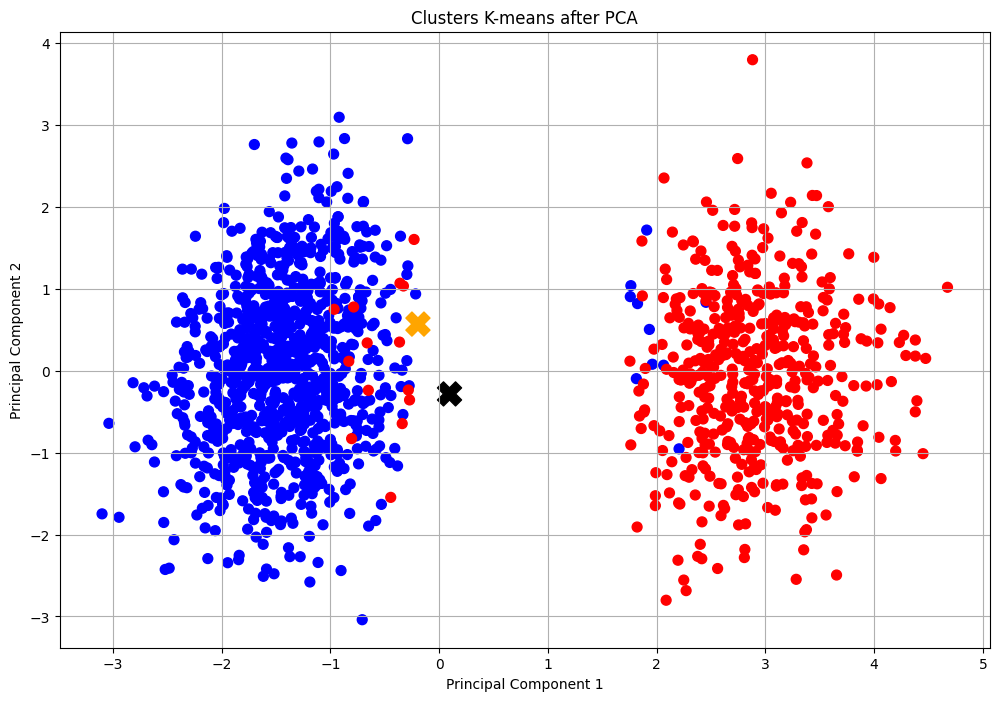

In [43]:
# Réduction de dimensionnalité
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

# Application du K-means
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X_scaled)
kmeans_predictions = kmeans_model.predict(X_scaled)

centroids_colors = ["black", "orange"] if kmeans_model.cluster_centers_[0, 0] > kmeans_model.cluster_centers_[1, 0] else ["black", "orange"]

plt.figure(figsize=(12, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=bill_data["is_genuine"].map({True: 'blue', False: 'red'}), s=50)
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], s=300, c=centroids_colors, marker="X", label="Centroids")
plt.title("Clusters K-means after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()


## 7.3 - Matrice de confusion

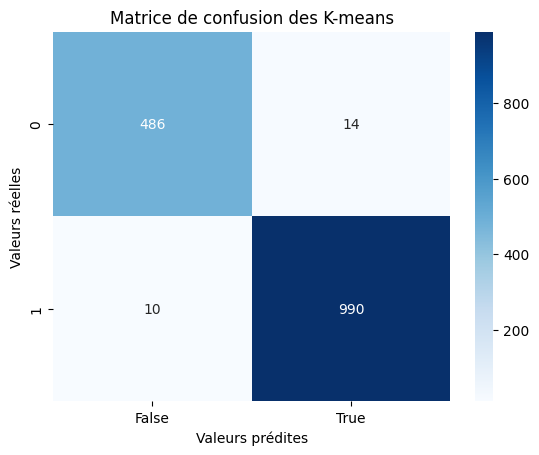

In [44]:
# Génération de la matrice de confusion
confusion = confusion_matrix(bill_data["is_genuine"], bill_data["predicted_label"])
sns.heatmap(confusion, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["False", "True"])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion des K-means")
plt.show()

- Taux de faux positifs : 0.93 % du dataset.
- Taux de vrais négatifs  : 0.67 % du dataset.
# 8 - K-means avec les caractéristiques "length", "margin_low" et "margin_up"
## 8.1 - Clustering avec K-means .


In [45]:
X3 = bill_data[["length", "margin_low", "margin_up"]]

scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)

kmeans3 = KMeans(n_clusters = 2, random_state = 42)
bill_data["cluster"] = kmeans3.fit_predict(X3_scaled)
for cluster in [0, 1] :
    majority_label = bill_data[bill_data["cluster"] == cluster]["is_genuine"].mode()[0]
    bill_data.loc[bill_data["cluster"] == cluster, "predicted_label"] = majority_label

bill_data["predicted_label"] = bill_data["predicted_label"].astype(bool)

# Affichage de la répartition des étiquettes prédites
predicted_label_counts = bill_data["predicted_label"].value_counts()
predicted_label_counts

predicted_label
True     1011
False     489
Name: count, dtype: int64

In [46]:
num_iterations = 10
results = []
X3 = bill_data[["length", "margin_low"]]
for iteration in range(num_iterations):
    scaler3 = StandardScaler()
    X3_scaled = scaler3.fit_transform(X3)

    kmeans3 = KMeans(n_clusters = 2, random_state = 42)
    bill_data["cluster"] = kmeans3.fit_predict(X3_scaled)

    for cluster in [0, 1] :
        majority_label = bill_data[bill_data["cluster"] == cluster]["is_genuine"].mode()[0]
        bill_data.loc[bill_data["cluster"] == cluster, "predicted_label"] = majority_label

    bill_data["predicted_label"] = bill_data["predicted_label"].astype(bool)

    accuracy = np.mean(bill_data["predicted_label"] == bill_data["is_genuine"])
    results.append(accuracy)

for i, accuracy in enumerate(results):
    print(f"Iteration {i + 1}: Accuracy = {accuracy}")

best_iteration = np.argmax(results)
print(f"Meilleure itération: {best_iteration + 1}")
print(f"Meilleur score: {results[best_iteration]}")

bill_data["cluster"] = kmeans.fit_predict(X_scaled)  # Utiliser les mêmes données mises à l'échelle
majority_label = bill_data[bill_data["cluster"] == cluster]["is_genuine"].mode()[0]
bill_data.loc[bill_data["cluster"] == cluster, "predicted_label"] = majority_label
bill_data["predicted_label"] = bill_data["predicted_label"].astype(bool)

# Affichage de la répartition des étiquettes prédites
predicted_label_counts = bill_data["predicted_label"].value_counts()
predicted_label_counts

Iteration 1: Accuracy = 0.9786666666666667
Iteration 2: Accuracy = 0.9786666666666667
Iteration 3: Accuracy = 0.9786666666666667
Iteration 4: Accuracy = 0.9786666666666667
Iteration 5: Accuracy = 0.9786666666666667
Iteration 6: Accuracy = 0.9786666666666667
Iteration 7: Accuracy = 0.9786666666666667
Iteration 8: Accuracy = 0.9786666666666667
Iteration 9: Accuracy = 0.9786666666666667
Iteration 10: Accuracy = 0.9786666666666667
Meilleure itération: 1
Meilleur score: 0.9786666666666667


predicted_label
True     998
False    502
Name: count, dtype: int64

In [47]:
# Calcul du score de silhouette
silhouette_avg = silhouette_score(X3_scaled, bill_data["cluster"])
print(f"Score de silhouette moyen : {silhouette_avg}")

Score de silhouette moyen : 0.6030651308251521


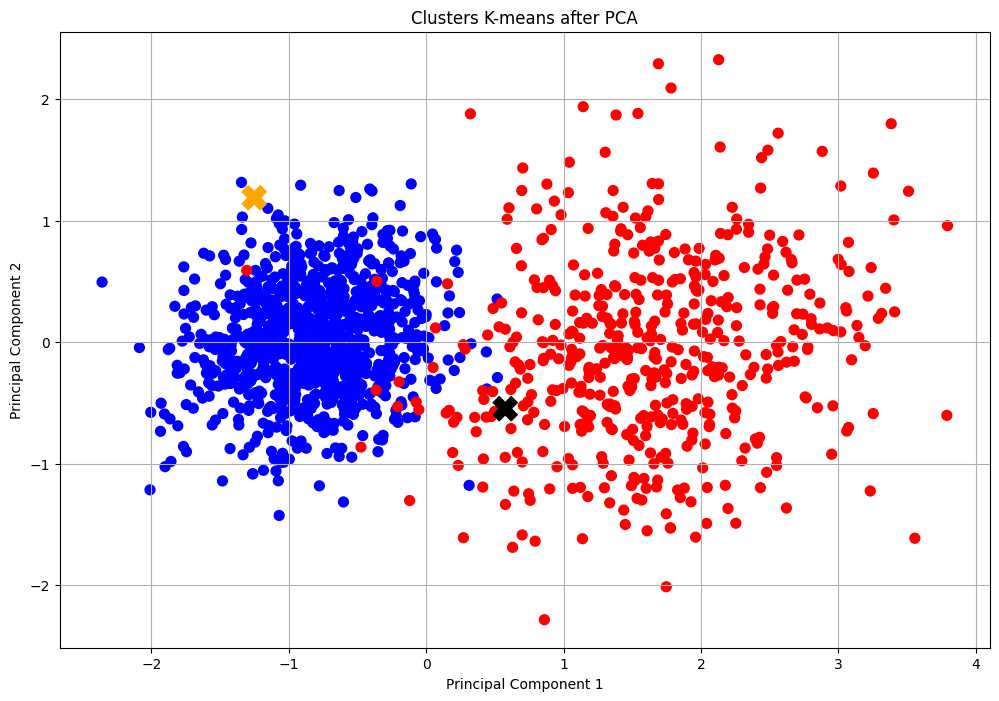

In [48]:
# Réduction de dimensionnalité
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X3_scaled)

# Application du K-means
kmeans_model3 = KMeans(n_clusters=2, random_state=42)
kmeans_model3.fit(X3_scaled)
kmeans_predictions3 = kmeans_model3.predict(X3_scaled)

centroids_colors = ["black", "orange"] if kmeans_model3.cluster_centers_[0, 0] > kmeans_model3.cluster_centers_[1, 0] else ["black", "orange"]

plt.figure(figsize=(12, 8))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=bill_data["is_genuine"].map({True: 'blue', False: 'red'}), s=50)
plt.scatter(kmeans_model3.cluster_centers_[:, 0], kmeans_model3.cluster_centers_[:, 1], s=300, c=centroids_colors, marker="X", label="Centroids")
plt.title("Clusters K-means after PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

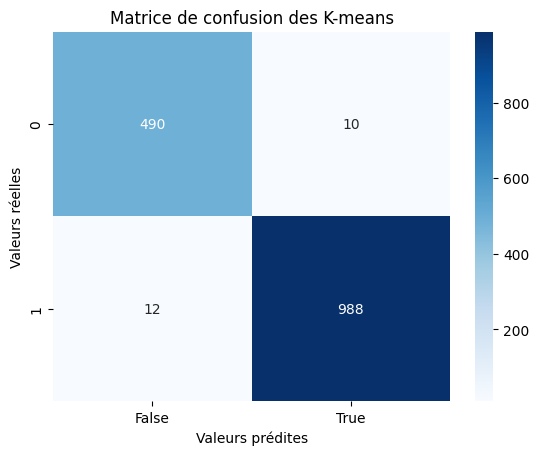

In [49]:
confusion = confusion_matrix(bill_data["is_genuine"], bill_data["predicted_label"])
sns.heatmap(confusion, annot = True, fmt = "d", cmap = "Blues", xticklabels = ["False", "True"])

plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.title("Matrice de confusion des K-means")
plt.show()

- Taux de faux positifs : 2 % du dataset.
- Taux de vrais négatifs  : 0.13 % du dataset.
# 9 - Random Forest

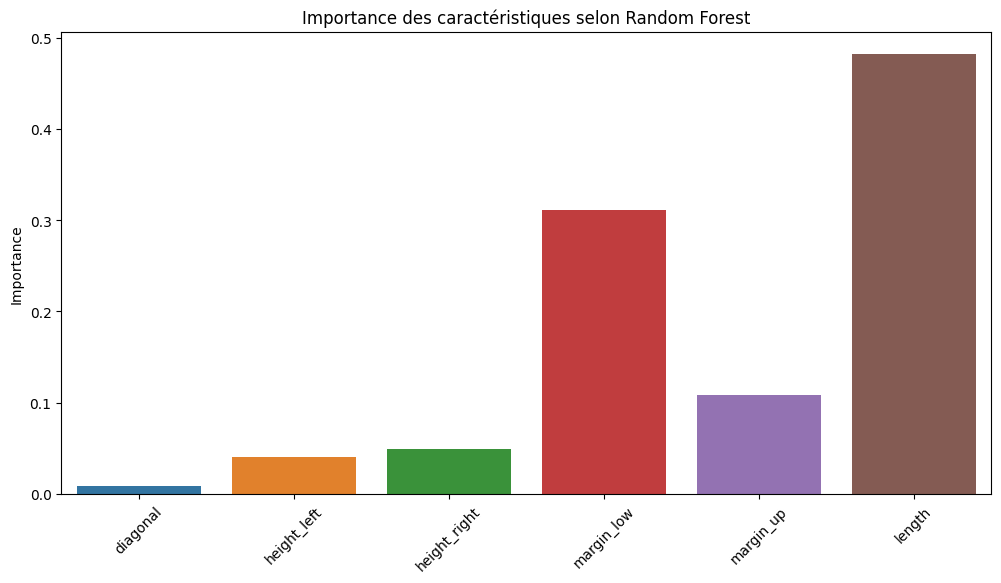

taux de précision : 0.99


In [50]:
bill_data_rf = bill_data.drop(columns=["predicted_label", "cluster"], errors = "ignore")
X = bill_data_rf.drop("is_genuine",axis = 1)
y = bill_data_rf["is_genuine"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Création du modèle de Random Forest
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = rf.predict(X_test)

# Calcul de la précision
accuracy = accuracy_score(y_test, y_pred)

# Visualisation de l'importance des caractéristiques
feature_importances = rf.feature_importances_
features = X.columns

plt.figure(figsize = (12, 6))
sns.barplot(x = features, y = feature_importances)
plt.title("Importance des caractéristiques selon Random Forest")
plt.ylabel("Importance")
plt.xticks(rotation = 45)
plt.show()

print ("taux de précision :", accuracy)

- La caractéristique "length" semble être la plus importante pour le modèle, suivie de "margin_low" et de "margin_up".
# 10 - Choix du mode d'apprentissage et création de la fonction à exporter

In [51]:
import joblib

def modele_logistique_combined(data):
    X2 = data[["length", "margin_low", "margin_up"]]
    y2 = data["is_genuine"]

    scaler = StandardScaler()
    X2_scaled = scaler.fit_transform(X2)

    X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42, stratify=y2)

    # Entraînement du modèle
    logistic_model2 = LogisticRegression()
    logistic_model2.fit(X2_train, y2_train)

    # Prédictions
    y2_pred_train = logistic_model2.predict(X2_train)
    y2_pred_test = logistic_model2.predict(X2_test)

    # Evaluation du modèle
    train_score2 = accuracy_score(y2_train, y2_pred_train)
    test_score2 = accuracy_score(y2_test, y2_pred_test)

    # Création d' un dictionnaire contenant à la fois le modèle entraîné et le scaler
    model_scaler_dict = {
        'model': logistic_model2,
        'scaler': scaler
    }

    return model_scaler_dict, train_score2, test_score2

# Chargement du dataset d'entraînement
try:
    bill_data = pd.read_csv('bill_data.csv', sep=';')
except Exception as e:
    load_data_error = f"An error occurred while loading the training data: {e}"

# Entraînement du modèle et obtention des résultats
try:
    model_scaler_dict, train_score_combined, test_score_combined = modele_logistique_combined(bill_data)
except Exception as e:
    training_error_combined = f"An error occurred while training the model: {e}"

# Sauvegarde de l'entraînement et du modèle dans un fichier .pkl
try:
    save_path_combined = 'reg_log.pkl'
    joblib.dump(model_scaler_dict, save_path_combined)
except Exception as e:
    save_model_error_combined = f"An error occurred while saving the model: {e}"

train_score_combined, test_score_combined, save_path_combined


(0.9925, 0.9866666666666667, 'reg_log.pkl')